In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import statsmodels.api as sm
import itertools
from matplotlib.pylab import rcParams
plt.style.use('ggplot')
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

# Import time series

In [12]:
import pickle
with open('./data/melted_zip7.pickle', 'rb') as file:
    melted_zip7 = pickle.load(file)
    

# ARIMA Modeling

In [13]:
melted_zip7.head()

,value
time,
2010-03-01,76000.0
2010-04-01,76600.0
2010-05-01,77400.0
2010-06-01,77700.0
2010-07-01,77200.0


In [14]:
ts1 = melted_zip7['2010-01-01':]
ts1

,value
time,
2010-03-01,76000.0
2010-04-01,76600.0
2010-05-01,77400.0
2010-06-01,77700.0
2010-07-01,77200.0
...,...
2017-12-01,90300.0
2018-01-01,91000.0
2018-02-01,94900.0


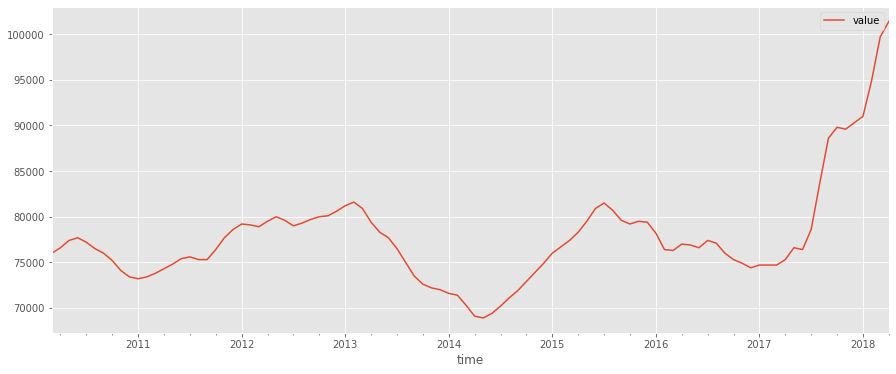

              value
time               
2010-03-01  76000.0
2010-04-01  76600.0
2010-05-01  77400.0
2010-06-01  77700.0
2010-07-01  77200.0


In [15]:
#ts1 = melted_zip2['value'].resample('MS').mean()
ts1 = ts1.fillna(ts1.bfill())
ts1.plot(figsize=(15,6))
plt.show()

print(ts1.head())

In [10]:
warnings.filterwarnings('ignore')
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)  

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 1) for x in list(itertools.product(p, d, q))]

In [11]:
warnings.filterwarnings('ignore')
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts1,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue  

ARIMA (0, 0, 0) x (0, 0, 0, 1)12 : AIC Calculated =2462.544454120435
ARIMA (0, 0, 0) x (0, 0, 1, 1)12 : AIC Calculated =2370.1171114201948
ARIMA (0, 0, 0) x (0, 0, 2, 1)12 : AIC Calculated =2330.808713495066
ARIMA (0, 0, 0) x (0, 1, 0, 1)12 : AIC Calculated =1642.789706644196
ARIMA (0, 0, 0) x (0, 1, 1, 1)12 : AIC Calculated =1552.63477319998
ARIMA (0, 0, 0) x (0, 1, 2, 1)12 : AIC Calculated =1510.5507047870387
ARIMA (0, 0, 0) x (0, 2, 0, 1)12 : AIC Calculated =1569.1487931318266
ARIMA (0, 0, 0) x (0, 2, 1, 1)12 : AIC Calculated =1544.0803298162086
ARIMA (0, 0, 0) x (0, 2, 2, 1)12 : AIC Calculated =1520.5541725582943
ARIMA (0, 0, 0) x (1, 0, 0, 1)12 : AIC Calculated =1655.684714124513
ARIMA (0, 0, 0) x (1, 0, 1, 1)12 : AIC Calculated =1575.752230091825
ARIMA (0, 0, 0) x (1, 0, 2, 1)12 : AIC Calculated =1531.3778382397622
ARIMA (0, 0, 0) x (1, 1, 0, 1)12 : AIC Calculated =1573.2804466042164
ARIMA (0, 0, 0) x (1, 1, 1, 1)12 : AIC Calculated =1541.2598452743691
ARIMA (0, 0, 0) x (1, 1, 2,

ARIMA (0, 1, 1) x (1, 0, 1, 1)12 : AIC Calculated =1517.9239762708335
ARIMA (0, 1, 1) x (1, 0, 2, 1)12 : AIC Calculated =1498.791345780092
ARIMA (0, 1, 1) x (1, 1, 0, 1)12 : AIC Calculated =1541.8534190353057
ARIMA (0, 1, 1) x (1, 1, 1, 1)12 : AIC Calculated =1514.2048776191837
ARIMA (0, 1, 1) x (1, 1, 2, 1)12 : AIC Calculated =1491.137092924774
ARIMA (0, 1, 1) x (1, 2, 0, 1)12 : AIC Calculated =1570.1214194620918
ARIMA (0, 1, 1) x (1, 2, 1, 1)12 : AIC Calculated =1519.761024452637
ARIMA (0, 1, 1) x (1, 2, 2, 1)12 : AIC Calculated =1488.110802955824
ARIMA (0, 1, 1) x (2, 0, 0, 1)12 : AIC Calculated =1537.2236451396996
ARIMA (0, 1, 1) x (2, 0, 1, 1)12 : AIC Calculated =1529.498239631017
ARIMA (0, 1, 1) x (2, 0, 2, 1)12 : AIC Calculated =1510.3879088376787
ARIMA (0, 1, 1) x (2, 1, 0, 1)12 : AIC Calculated =1521.862575440931
ARIMA (0, 1, 1) x (2, 1, 1, 1)12 : AIC Calculated =1507.8399508446885
ARIMA (0, 1, 1) x (2, 1, 2, 1)12 : AIC Calculated =1488.4767510771799
ARIMA (0, 1, 1) x (2, 2, 0

ARIMA (0, 2, 2) x (2, 0, 2, 1)12 : AIC Calculated =1474.6351170187636
ARIMA (0, 2, 2) x (2, 1, 0, 1)12 : AIC Calculated =1512.8007030633405
ARIMA (0, 2, 2) x (2, 1, 1, 1)12 : AIC Calculated =1491.837000925193
ARIMA (0, 2, 2) x (2, 1, 2, 1)12 : AIC Calculated =1463.6785452279587
ARIMA (0, 2, 2) x (2, 2, 0, 1)12 : AIC Calculated =1525.552353862234
ARIMA (0, 2, 2) x (2, 2, 1, 1)12 : AIC Calculated =1501.1589681680389
ARIMA (0, 2, 2) x (2, 2, 2, 1)12 : AIC Calculated =1494.6118400165624
ARIMA (1, 0, 0) x (0, 0, 0, 1)12 : AIC Calculated =1655.684714124513
ARIMA (1, 0, 0) x (0, 0, 1, 1)12 : AIC Calculated =1567.2241574221398
ARIMA (1, 0, 0) x (0, 0, 2, 1)12 : AIC Calculated =1564.9525006780245
ARIMA (1, 0, 0) x (0, 1, 0, 1)12 : AIC Calculated =1573.2804466042164
ARIMA (1, 0, 0) x (0, 1, 1, 1)12 : AIC Calculated =1541.259845243381
ARIMA (1, 0, 0) x (0, 1, 2, 1)12 : AIC Calculated =1512.4946685049777
ARIMA (1, 0, 0) x (0, 2, 0, 1)12 : AIC Calculated =1568.8462493167112
ARIMA (1, 0, 0) x (0, 2,

ARIMA (1, 1, 1) x (0, 1, 1, 1)12 : AIC Calculated =1514.2048776132895
ARIMA (1, 1, 1) x (0, 1, 2, 1)12 : AIC Calculated =1491.1370931225124
ARIMA (1, 1, 1) x (0, 2, 0, 1)12 : AIC Calculated =1575.534045393837
ARIMA (1, 1, 1) x (0, 2, 1, 1)12 : AIC Calculated =1519.761024455542
ARIMA (1, 1, 1) x (0, 2, 2, 1)12 : AIC Calculated =1488.110803177321
ARIMA (1, 1, 1) x (1, 0, 0, 1)12 : AIC Calculated =1537.2704382176823
ARIMA (1, 1, 1) x (1, 0, 1, 1)12 : AIC Calculated =1519.5438212874224
ARIMA (1, 1, 1) x (1, 0, 2, 1)12 : AIC Calculated =1505.8427608591533
ARIMA (1, 1, 1) x (1, 1, 0, 1)12 : AIC Calculated =1541.9156589719707
ARIMA (1, 1, 1) x (1, 1, 1, 1)12 : AIC Calculated =1529.661222351673
ARIMA (1, 1, 1) x (1, 1, 2, 1)12 : AIC Calculated =1492.701837254511
ARIMA (1, 1, 1) x (1, 2, 0, 1)12 : AIC Calculated =1571.1859286573003
ARIMA (1, 1, 1) x (1, 2, 1, 1)12 : AIC Calculated =1515.2425828861738
ARIMA (1, 1, 1) x (1, 2, 2, 1)12 : AIC Calculated =1490.089207697298
ARIMA (1, 1, 1) x (2, 0, 0

ARIMA (1, 2, 2) x (1, 1, 2, 1)12 : AIC Calculated =1470.5702302122138
ARIMA (1, 2, 2) x (1, 2, 0, 1)12 : AIC Calculated =1558.6085615882973
ARIMA (1, 2, 2) x (1, 2, 1, 1)12 : AIC Calculated =1505.1802117336238
ARIMA (1, 2, 2) x (1, 2, 2, 1)12 : AIC Calculated =1490.9116073329797
ARIMA (1, 2, 2) x (2, 0, 0, 1)12 : AIC Calculated =1504.8377285381803
ARIMA (1, 2, 2) x (2, 0, 1, 1)12 : AIC Calculated =1489.6680211455978
ARIMA (1, 2, 2) x (2, 0, 2, 1)12 : AIC Calculated =1475.0668874039568
ARIMA (1, 2, 2) x (2, 1, 0, 1)12 : AIC Calculated =1500.1957497759581
ARIMA (1, 2, 2) x (2, 1, 1, 1)12 : AIC Calculated =1485.1022734034696
ARIMA (1, 2, 2) x (2, 1, 2, 1)12 : AIC Calculated =1465.126400820468
ARIMA (1, 2, 2) x (2, 2, 0, 1)12 : AIC Calculated =1534.4280061762574
ARIMA (1, 2, 2) x (2, 2, 1, 1)12 : AIC Calculated =1498.8415752702397
ARIMA (1, 2, 2) x (2, 2, 2, 1)12 : AIC Calculated =1490.3740375563589
ARIMA (2, 0, 0) x (0, 0, 0, 1)12 : AIC Calculated =1574.5064014671434
ARIMA (2, 0, 0) x (0,

ARIMA (2, 1, 0) x (2, 2, 0, 1)12 : AIC Calculated =1516.3853665762056
ARIMA (2, 1, 0) x (2, 2, 1, 1)12 : AIC Calculated =1505.8565156923032
ARIMA (2, 1, 0) x (2, 2, 2, 1)12 : AIC Calculated =1494.5018605408843
ARIMA (2, 1, 1) x (0, 0, 0, 1)12 : AIC Calculated =1546.4171452216262
ARIMA (2, 1, 1) x (0, 0, 1, 1)12 : AIC Calculated =1533.1644085834248
ARIMA (2, 1, 1) x (0, 0, 2, 1)12 : AIC Calculated =1506.402812550899
ARIMA (2, 1, 1) x (0, 1, 0, 1)12 : AIC Calculated =1521.8692832969346
ARIMA (2, 1, 1) x (0, 1, 1, 1)12 : AIC Calculated =1507.849209061535
ARIMA (2, 1, 1) x (0, 1, 2, 1)12 : AIC Calculated =1488.4745483856464
ARIMA (2, 1, 1) x (0, 2, 0, 1)12 : AIC Calculated =1552.8248724600064
ARIMA (2, 1, 1) x (0, 2, 1, 1)12 : AIC Calculated =1512.738726556151
ARIMA (2, 1, 1) x (0, 2, 2, 1)12 : AIC Calculated =1490.0892723063441
ARIMA (2, 1, 1) x (1, 0, 0, 1)12 : AIC Calculated =1521.347153994422
ARIMA (2, 1, 1) x (1, 0, 1, 1)12 : AIC Calculated =1521.1934838542836
ARIMA (2, 1, 1) x (1, 0,

ARIMA (2, 2, 2) x (0, 2, 1, 1)12 : AIC Calculated =1499.2051788769272
ARIMA (2, 2, 2) x (0, 2, 2, 1)12 : AIC Calculated =1492.4974866982127
ARIMA (2, 2, 2) x (1, 0, 0, 1)12 : AIC Calculated =1509.8462608855598
ARIMA (2, 2, 2) x (1, 0, 1, 1)12 : AIC Calculated =1489.6210086197052
ARIMA (2, 2, 2) x (1, 0, 2, 1)12 : AIC Calculated =1476.31378073281
ARIMA (2, 2, 2) x (1, 1, 0, 1)12 : AIC Calculated =1499.6744493124525
ARIMA (2, 2, 2) x (1, 1, 1, 1)12 : AIC Calculated =1484.8712118978851
ARIMA (2, 2, 2) x (1, 1, 2, 1)12 : AIC Calculated =1463.6521427379632
ARIMA (2, 2, 2) x (1, 2, 0, 1)12 : AIC Calculated =1533.9791577235817
ARIMA (2, 2, 2) x (1, 2, 1, 1)12 : AIC Calculated =1498.842533733849
ARIMA (2, 2, 2) x (1, 2, 2, 1)12 : AIC Calculated =1490.3743400800315
ARIMA (2, 2, 2) x (2, 0, 0, 1)12 : AIC Calculated =1489.7256044983553
ARIMA (2, 2, 2) x (2, 0, 1, 1)12 : AIC Calculated =1491.3035923735831
ARIMA (2, 2, 2) x (2, 0, 2, 1)12 : AIC Calculated =1478.9094472834122
ARIMA (2, 2, 2) x (2, 1

In [16]:
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq        (2, 1, 2)
pdqs    (1, 2, 2, 1)
aic          1463.65
Name: 638, dtype: object

In [17]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(ts1, 
                                        order=(1, 1, 2), 
                                        seasonal_order=(2, 2, 2, 1), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2966      0.306      0.970      0.332      -0.303       0.896
ma.L1         -0.4919      0.327     -1.504      0.133      -1.133       0.149
ma.L2         -0.4967      0.251     -1.975      0.048      -0.990      -0.004
ar.S.L1        0.7042      0.354      1.989      0.047       0.010       1.398
ar.S.L2       -0.5039      0.164     -3.080      0.002      -0.825      -0.183
ma.S.L1       -1.3325      0.268     -4.980      0.000      -1.857      -0.808
ma.S.L2        0.5550      0.275      2.019      0.043       0.016       1.094
sigma2      6.655e+05   1.95e+05      3.409      0.001    2.83e+05    1.05e+06


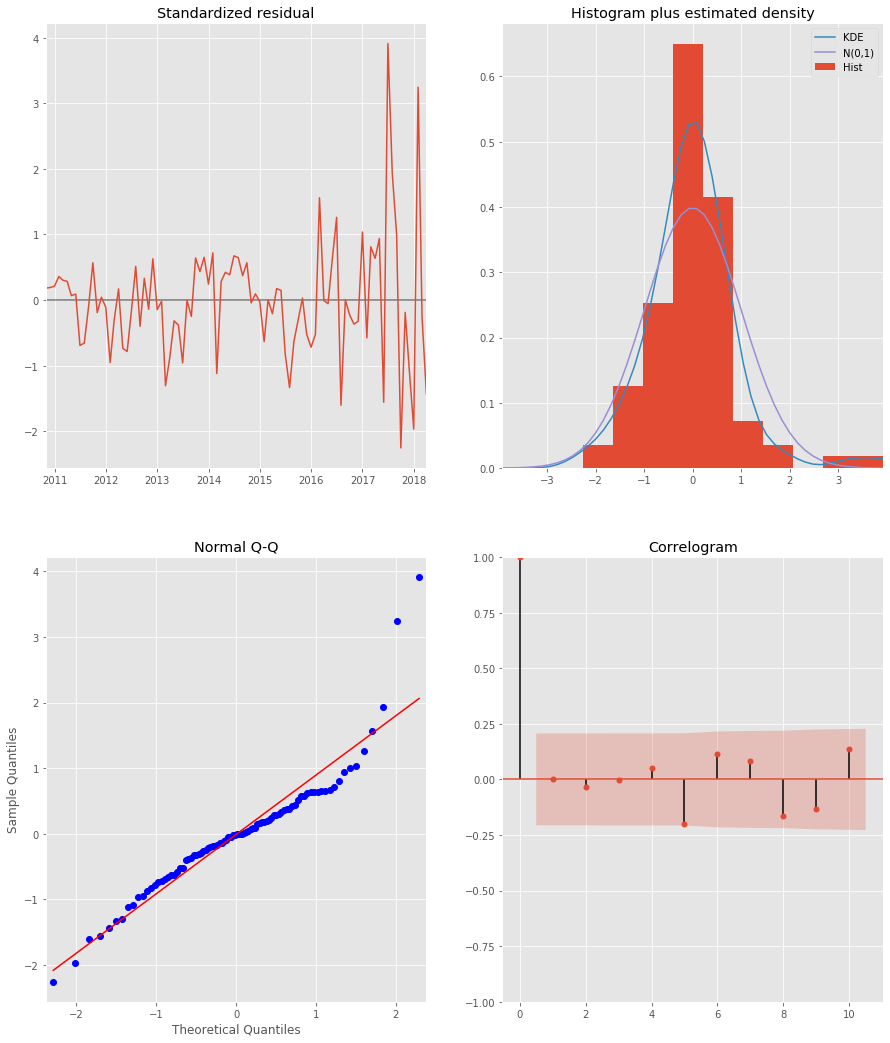

In [18]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

## One-step Ahead Forecasting

In [20]:
# Get predictions starting from 01-01-1998 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_conf = pred.conf_int()

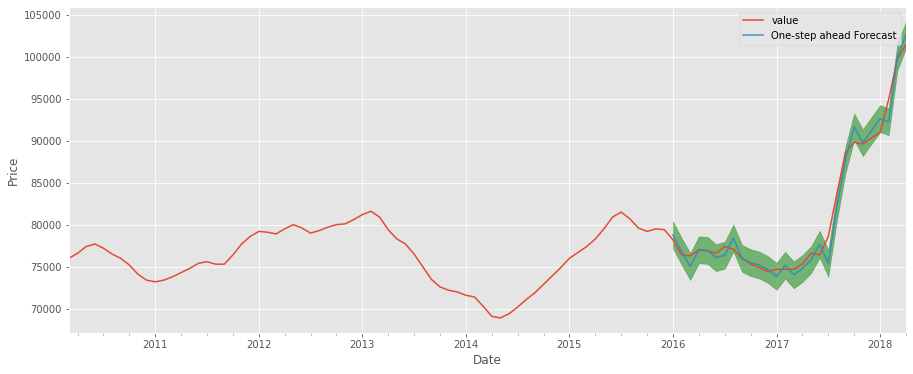

In [21]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = ts1['2010-01-01':].plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()

plt.show()

In [165]:
# pred.predicted_mean

In [22]:
# Get the real and predicted values
ts1_forecasted = pred.predicted_mean
ts1_truth = ts1['2016-01-01':]
mse = mean_squared_error(ts1_truth, ts1_forecasted)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))




The Root Mean Squared Error of our forecasts is 1164.84


## Dynamic Forecasting

In [23]:
# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

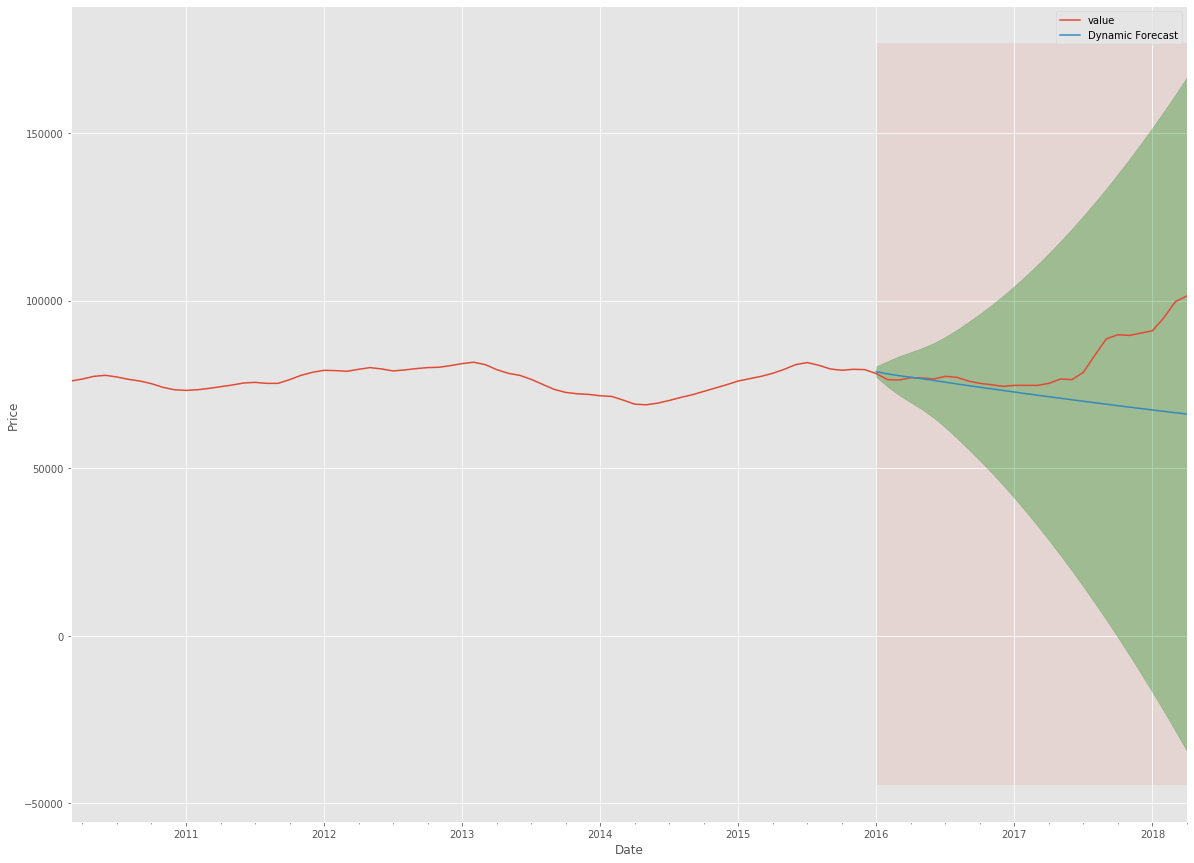

In [24]:
# Plot the dynamic forecast with confidence intervals.

ax = ts1['2010':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)


ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2016-01-01'), ts1_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.show()

In [27]:
# Get the real and predicted values
ts1_forecasted = pred_dynamic.predicted_mean
ts1_truth = ts1['2016-01-01':]
mse = mean_squared_error(ts1_truth, ts1_forecasted)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 14485.43


In [28]:
print(mse)

209827628.16752958


## Producing and visualising forecasts

In [29]:
# Get forecast 500 steps ahead in future
prediction = output.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

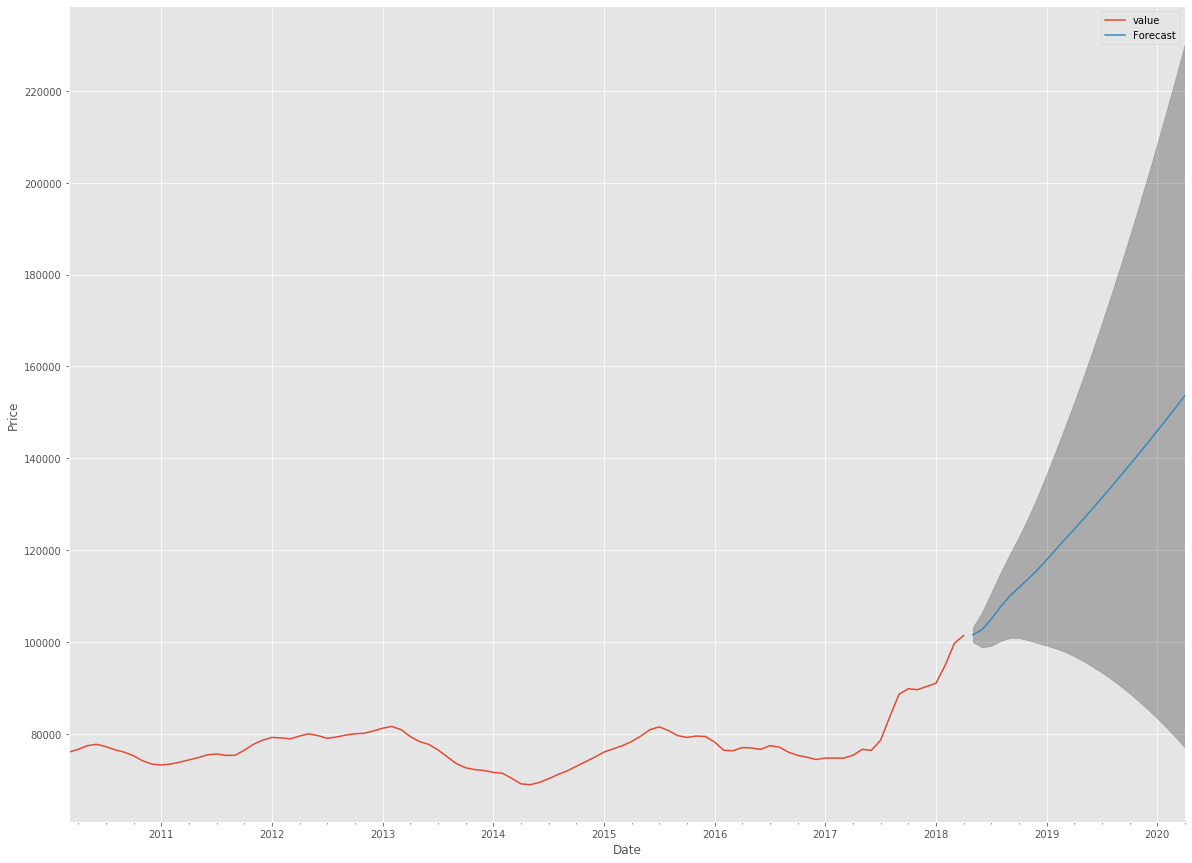

In [30]:
# Plot future predictions with confidence intervals
ax = ts1.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.show()

In [31]:
prediction.predicted_mean['2020-01-01']

145954.73232092275

In [32]:
# ROI
print((prediction.predicted_mean['2020-01-01']/ts1['2018-01'])-1)

               value
time                
2018-01-01  0.603898
